In [ ]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular


###Problem 2

Generate a set of $n=100$ data points $(x_i,y_i)$ for $i=1,\ldots,n$ with
$$ \frac{1}{2} = x_1 < x_2 < \cdots < x_{n-1} < x_{n} = 1$$
$$y_i = a e^{b (x_i+1)} + \delta_i, \quad i=1,2,\ldots,n$$
where $a=b=2$. Assume that $\delta_i$'s are independent and normally distributed with mean $0$ and variance $1$ using `numpy.random.randn(n)`

Although the data points exhibit a nonlinear relationship, we can transform the problem into a linear form by taking the natural logarithm as follows.
$$\ln y = \ln a + b (x+1)$$
This leads to the following linear system
$$\begin{bmatrix}
  1 & x_1+1\\
  1 & x_2+1\\
  \vdots\\
  1 & x_n+1
\end{bmatrix}
\begin{bmatrix}
  \ln a\\
  b
\end{bmatrix}
= \begin{bmatrix}
  \ln y_1\\
  \ln y_2\\
  \vdots\\
  \ln y_n
\end{bmatrix}$$
Determine the best exponential curve that fits the given data points by solving the corresponding linear least squares problem via singular value decomposition. In one figure, plot the true and fitted nonlinear curves with the given data points. Discuss your results.

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular

def solve_svd(A, y):
  ''' solves Ax = y using SVD '''
  U, S, Vh = sp.linalg.svd(A, full_matrices = False)
  x = Vh.T @ np.diag(1/S) @ U.T @ y
  return x

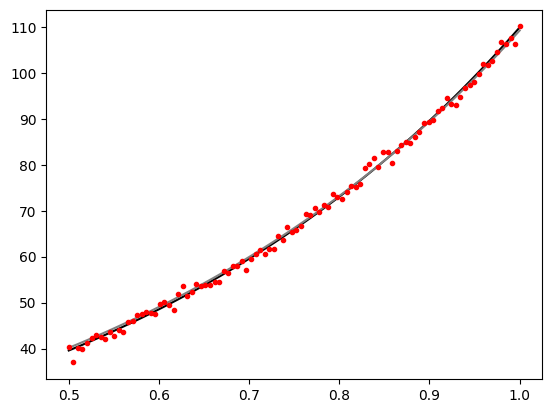

In [ ]:
n = 100
t = np.linspace(0.5,1,n)
y = 2*np.exp( 2*(t+1)) + np.random.randn(n); # noisy data
y_true=2*np.exp(2*(t+1)) #y without noise

A=np.zeros((n,2))
A[:,0]=1
A[:,1]=t+1

z=solve_svd(A,np.log(y))
y_fit=(np.exp(z[0]))*np.exp(z[1]*(t+1)) #fitted y
#graphing the values
plt.plot(t,y_fit,'black')
plt.plot(t,y_true,'grey')
plt.plot(t,y,'r.')
plt.show()